In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from IPython.display import display

from utils import *

In [2]:
results = pd.read_csv("../results_gathering/results_table.csv")
results.head()

,pred_text,pred_text_len,pred_x,pred_y,pred_x1,pred_x2,pred_y1,pred_y2,pred_width,pred_hight,...,iou,labels_file_name,detections_file_name,recognition_file_name,image_name,image_width,image_height,dataset,model,weights
0,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
1,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
2,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
3,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt
4,-,-,-,-,-,-,-,-,-,-,...,0.0,gt_img_1.txt,detection_res_img_1.txt,recognition_res_img_1.txt,img_1.jpg,1280,720,ic15,db,tt


In [3]:
results.columns

Index(['pred_text', 'pred_text_len', 'pred_x', 'pred_y', 'pred_x1', 'pred_x2',
       'pred_y1', 'pred_y2', 'pred_width', 'pred_hight', 'text', 'text_len',
       'x', 'y', 'x1', 'x2', 'y1', 'y2', 'width', 'hight', 'detection_status',
       'recogniton_status', 'redable_label', 'iou', 'labels_file_name',
       'detections_file_name', 'recognition_file_name', 'image_name',
       'image_width', 'image_height', 'dataset', 'model', 'weights'],
      dtype='object')

In [4]:
# Remove non readable examples
print(f"Len of results table with all examples: {len(results)}")
results = results[results.redable_label == True]
print(f"Len of results table without non readable examples: {len(results)}")

Len of results table with all examples: 38334
Len of results table without non readable examples: 24389


In [5]:
path =  "./complexity_plots"
kategoria = "zbiór danych"

## Detection results analysis

In [6]:
split_column = 'dataset'

In [7]:
models_list = list(results.model.unique())
weights_list = list(results.weights.unique())

In [8]:
categories = list(pd.unique(results[split_column]))
categories.sort()
print(categories)

['ic03', 'ic15', 'tt']


In [9]:
detection_metrics = {}

for category in categories:
     
    df = results[results[split_column] == category]
    detection_metrics[category] = detection_metrics_to_df(df, models_list, weights_list)


In [10]:
for key, value in detection_metrics.items():
    print(key)
    
    display(value)

ic03


,system,precyzja,pełność,f1
0,System z modelem db wytrenowany na zbiorze tt,91.07,81.82,86.20
1,System z modelem db wytrenowany na zbiorze ic15,90.07,76.83,82.92
2,System z modelem textfusenet wytrenowany na zb...,94.69,82.71,88.30
3,System z modelem textfusenet wytrenowany na zb...,92.78,76.74,84.00


ic15


,system,precyzja,pełność,f1
0,System z modelem db wytrenowany na zbiorze tt,79.46,69.63,74.22
1,System z modelem db wytrenowany na zbiorze ic15,80.69,82.47,81.57
2,System z modelem textfusenet wytrenowany na zb...,90.57,52.24,66.26
3,System z modelem textfusenet wytrenowany na zb...,89.02,72.22,79.74


tt


,system,precyzja,pełność,f1
0,System z modelem db wytrenowany na zbiorze tt,77.66,64.74,70.61
1,System z modelem db wytrenowany na zbiorze ic15,69.17,64.20,66.59
2,System z modelem textfusenet wytrenowany na zb...,90.66,57.05,70.03
3,System z modelem textfusenet wytrenowany na zb...,88.09,61.17,72.20


In [11]:
import seaborn as sns
sns.set_theme()

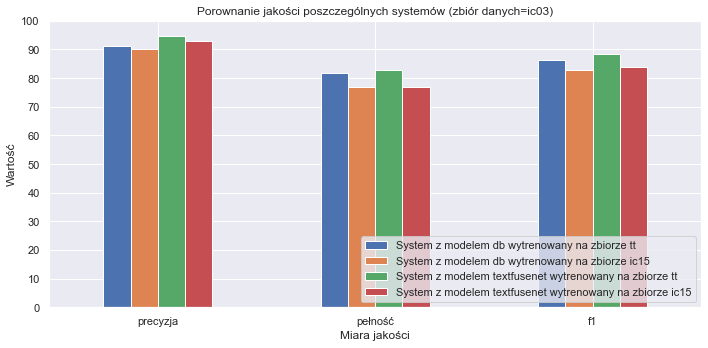

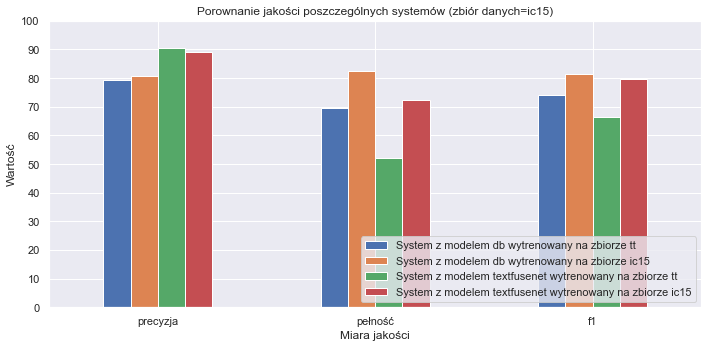

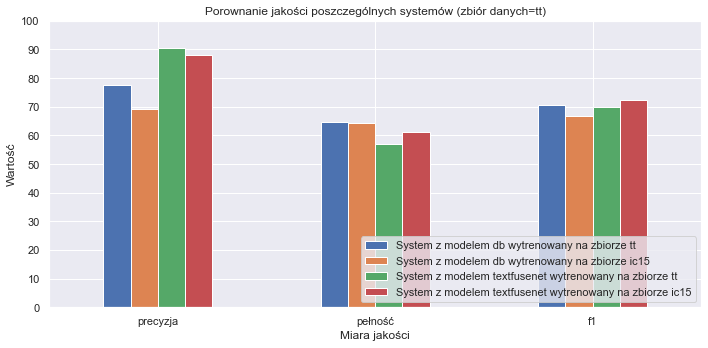

In [12]:
for key, value in detection_metrics.items():
    plot_detection_metrics(value, f"{path}/complexity_{key}_detection_metrics.png",
                          title = f"Porownanie jakości poszczególnych systemów ({kategoria}={key})")

## Plot metrics across split category

In [13]:
import seaborn as sns

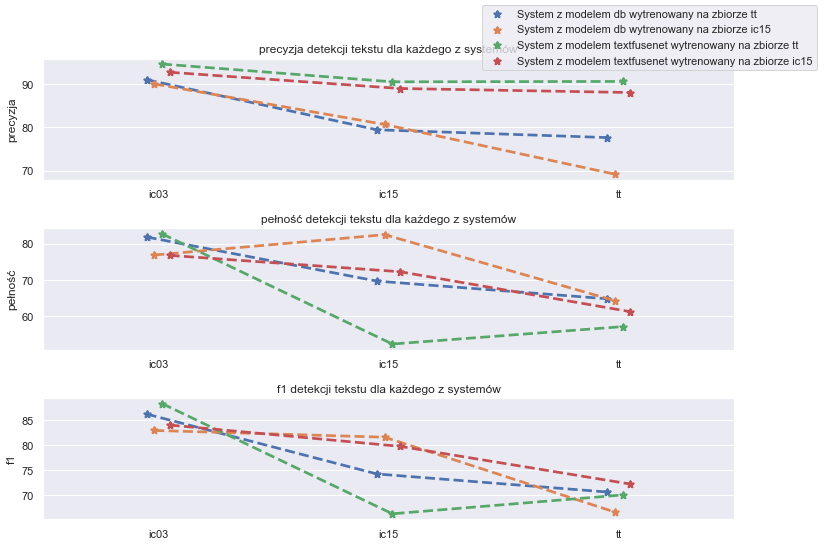

In [16]:
plot_detection_metrics_in_one(detection_metrics, filename=f"{path}/detections_metrics_subplot.jpg", figsize=(12, 8))

### plot detections of each system on random image from totaltext dataset

In [15]:
results.dataset.unique()

array(['ic15', 'tt', 'ic03'], dtype=object)

ic03


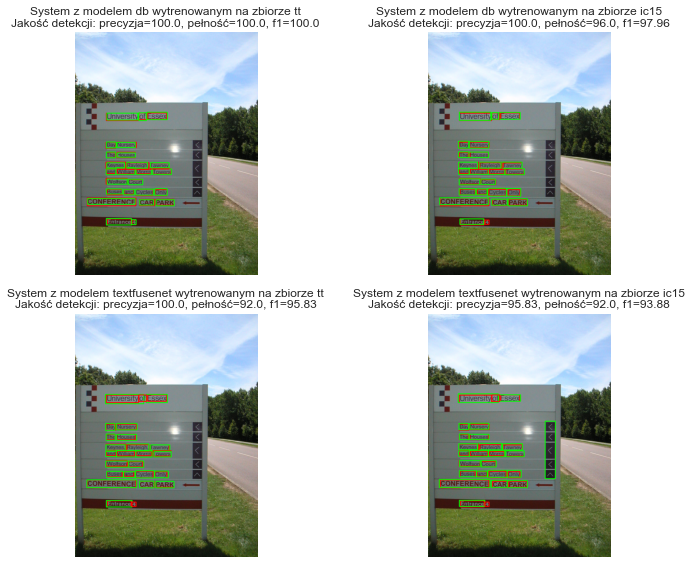

ic15


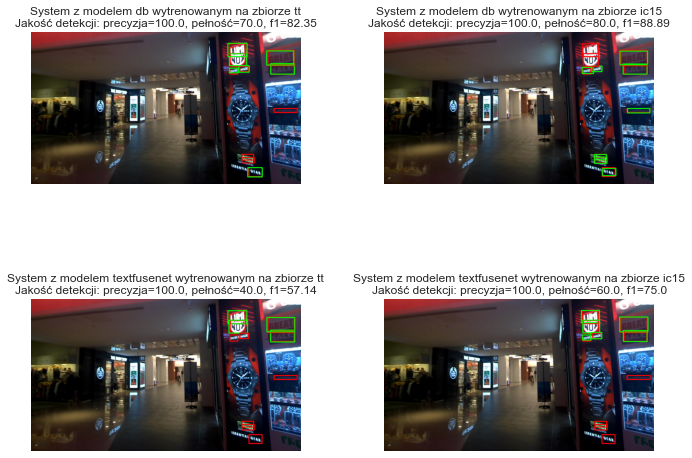

tt


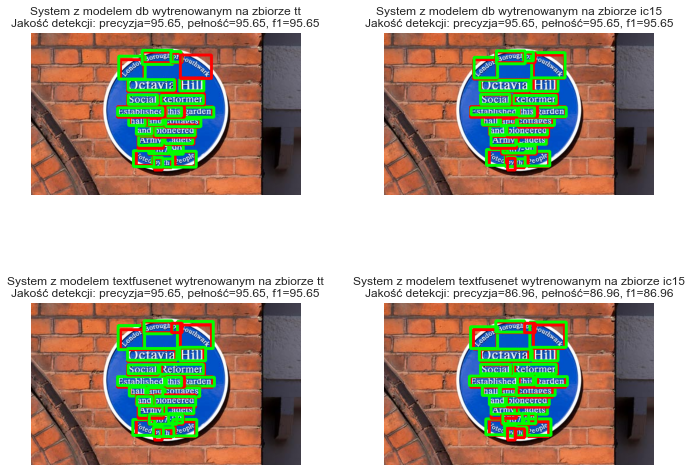

In [16]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
    plot_detections(df, models_list, weights_list, filename=f"{path}/{category}_detections.jpg")

## Recognition results analysis

In [17]:
recognition_metrics = {}

for category in categories:
     
    df = results[results[split_column] == category]
    recognition_metrics[category] = recognition_metrics_to_df(df, models_list, weights_list)

In [18]:
for key, value in recognition_metrics.items():
    print(key)
    
    display(value)

ic03


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,87.91,71.93
1,System z modelem db z wagami ic15,89.33,68.63
2,System z modelem textfusenet z wagami tt,90.30,74.69
3,System z modelem textfusenet z wagami ic15,91.52,70.23


ic15


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,71.18,49.57
1,System z modelem db z wagami ic15,70.23,57.92
2,System z modelem textfusenet z wagami tt,73.46,38.37
3,System z modelem textfusenet z wagami ic15,71.27,51.47


tt


,system,dokładność na poprawnych detekcjach,dokładność ogólnie
0,System z modelem db z wagami tt,80.45,52.08
1,System z modelem db z wagami ic15,79.44,50.99
2,System z modelem textfusenet z wagami tt,71.63,40.87
3,System z modelem textfusenet z wagami ic15,71.69,43.85


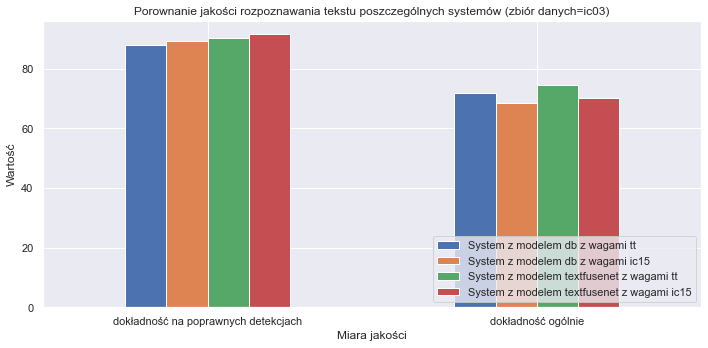

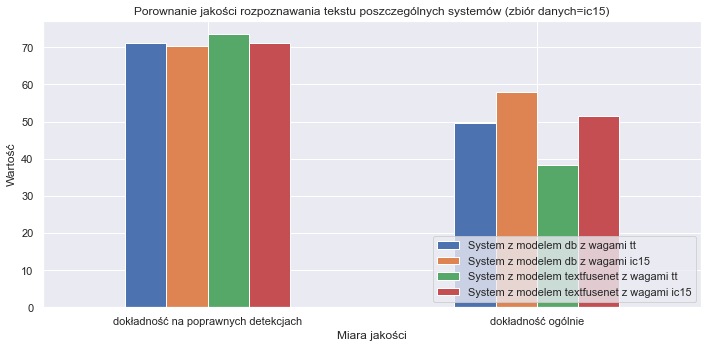

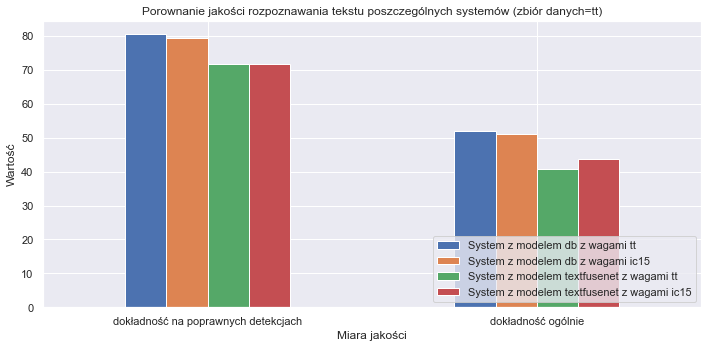

In [19]:
for key, value in recognition_metrics.items():
    print
    plot_recognition_metrics(value, f"{path}/{key}_recognition_metrics.png",
                          title = f"Porownanie jakości rozpoznawania tekstu poszczególnych systemów ({kategoria}={key})")

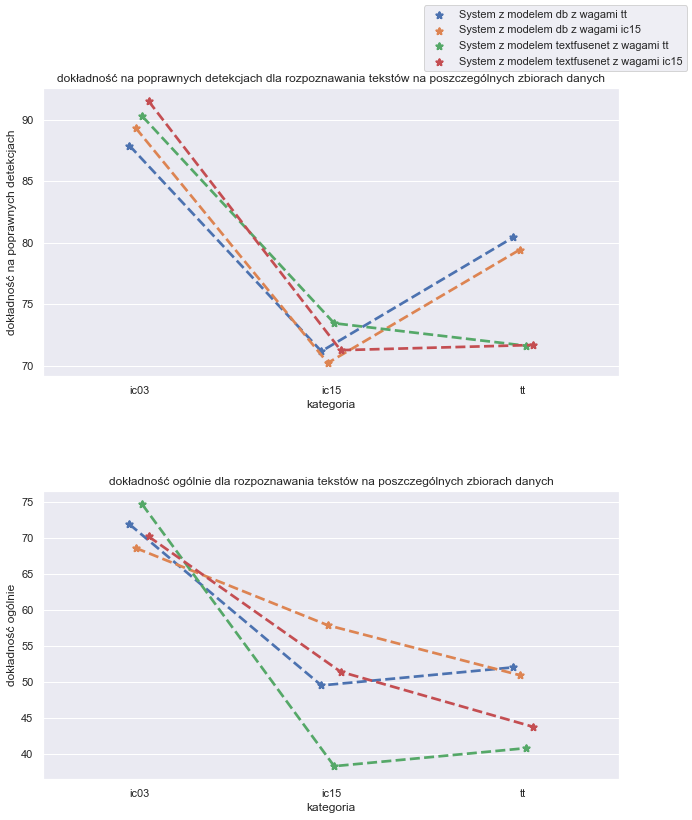

In [27]:
plot_recognition_metrics_in_one(recognition_metrics,
                               filename=f"{path}/recognitions_metrics_subplot.jpg",
                               figsize=(10, 12))

In [21]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
    plot_iou_histogram(df, models_list, weights_list, filename=f"{path}/{category}_iou_histograms.jpg")

ic03


ValueError: (15, 10) is not a valid value for sharex; supported values are 'all', 'row', 'col', 'none'

<Figure size 432x288 with 0 Axes>

### Recognition example

In [ ]:
for category in categories:
    
    print(category)
    df = results[results[split_column] == category]
    plot_recognitions(df, models_list, weights_list, filename=f"{path}/{category}_recognitions.jpg")

In [ ]:
a = plot_recognitions(results, models_list, weights_list, filename=None)

In [ ]:
int(a['pred_x1'])